# Graphic Statics I: Equilibrium of a Simple Node

reference:
<br>
grasshopper tutorial: 
https://block.arch.ethz.ch/eq/course/154/exercise/170

<div>
<img src="https://docplayer.net/docs-images/71/64312660/images/20-0.jpg" width="500"/>
</div>

In [1]:
import math as m

import compas
import compas_ags

from compas_ags.diagrams import FormGraph
from compas_ags.diagrams import FormDiagram
from compas_ags.diagrams import ForceDiagram
from compas_ags.viewers import Viewer
from compas_ags.ags import graphstatics

###    create a simple node from nodes and edges

In [2]:
### 
###  INPUT ANGLES OF N2 AND N3 IN RADIANS
###
ang_n1 = m.pi / 6
ang_n2 = m.pi / 4

nodes = [
    [0.0, 0.0, 0],
    [0.0, -1.0, 0],
    [-m.sin(ang_n1), m.cos(ang_n1), 0],
    [m.sin(ang_n2), m.cos(ang_n2), 0],]

edges = [
    (0, 1),
    (0, 2),
    (0, 3),]

# make form and force diagrams
graph = FormGraph.from_nodes_and_edges(nodes, edges)
form = FormDiagram.from_graph(graph)
force = ForceDiagram.from_formdiagram(form)

###    set applied load

In [3]:
form.set_fixed([0,1])
force.set_anchor([2])

# set the magnitude of the applied load N1
form.set_edge_force_by_index(0, 30.0)

# update force densities of form and force diagrams
graphstatics.form_update_q_from_qind(form)
graphstatics.force_update_from_form(force, form)

### display force and form diagrams

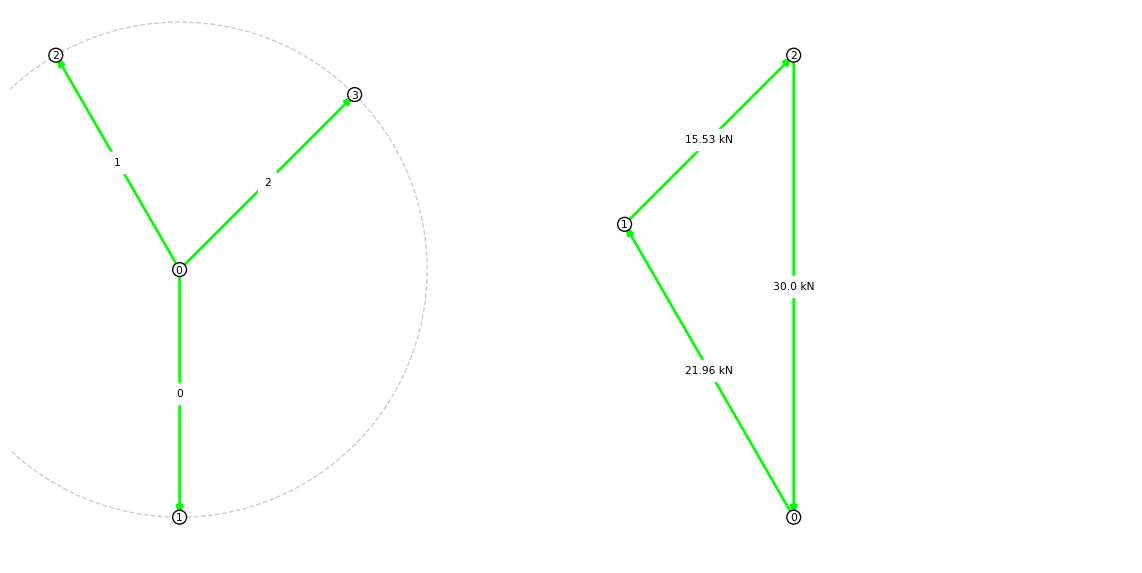

In [4]:
from compas.geometry import distance_point_point
import warnings
warnings.filterwarnings("ignore")

viewer = Viewer(form, force, delay_setup=False, figsize=(12, 10))

viewer.draw_form(
    arrows_on=True,
    vertexsize=0.15,
    vertexlabel={key: key for key in form.vertices()},
    edgelabel={uv: index for index, uv in enumerate(form.edges())},)

# compute the forces
force_dict = {}
for i, (u,v) in enumerate(force.edges()):
    length = distance_point_point(force.vertex_coordinates(u), force.vertex_coordinates(v))
    length = round(length, 2)
    force_dict[(u,v)] = "%s kN" % length
    
viewer.draw_force(
    arrows_on=True,
    vertexsize=0.15,
    vertexlabel={key: key for key in force.vertices()},
    edgelabel=force_dict,)

# draw the unit circle
import matplotlib.pyplot as plt
x = form.vertices_attribute('x')
y = form.vertices_attribute('y')
xmin, ymin = min(x), min(y)
xmax, ymax = max(x), max(y)
dx, dy = -xmin, -ymin
scale  = max(m.fabs(xmax - xmin) / 10.0, m.fabs(ymax - ymin) / 10.0)
circle = plt.Circle((dx/scale, dy/scale), 1/scale, fill=False, linestyle='--', ec='#cccccc', lw=1.0)
viewer.ax1.add_patch(circle)

viewer.show()

###    modify form diagrm: compute force magnitude

In [5]:
# store lines representing the current state of equilibrium
form_lines = []
for u, v in form.edges():
    form_lines.append({
        'start': form.vertex_coordinates(u, 'xy'),
        'end': form.vertex_coordinates(v, 'xy'),
        'width': 1.0,
        'color': '#cccccc',
        'style': '--'
    })

force_lines = []
for u, v in force.edges():
    force_lines.append({
        'start': force.vertex_coordinates(u, 'xy'),
        'end': force.vertex_coordinates(v, 'xy'),
        'width': 1.0,
        'color': '#cccccc',
        'style': '--'
    })
    
# store the original vertex locations
form_key_xyz = {key: form.vertex_coordinates(key) for key in form.vertices()}

In [6]:
### 
###  INPUT NEW ANGLES OF N2 AND N3 IN RADIANS
###
ang_n1_new = m.pi / 4
ang_n2_new = m.pi / 3

form.vertex_attributes(2, 'xyz', [-m.sin(ang_n1_new), m.cos(ang_n1_new), 0])
form.vertex_attributes(3, 'xyz', [m.sin(ang_n2_new), m.cos(ang_n2_new), 0])

# set the magnitude of the applied load N1
form.set_edge_force_by_index(0, 30.0)

# update force densities of form and force diagrams
graphstatics.form_update_q_from_qind(form)
# update form and force diagrams
graphstatics.force_update_from_form(force, form)

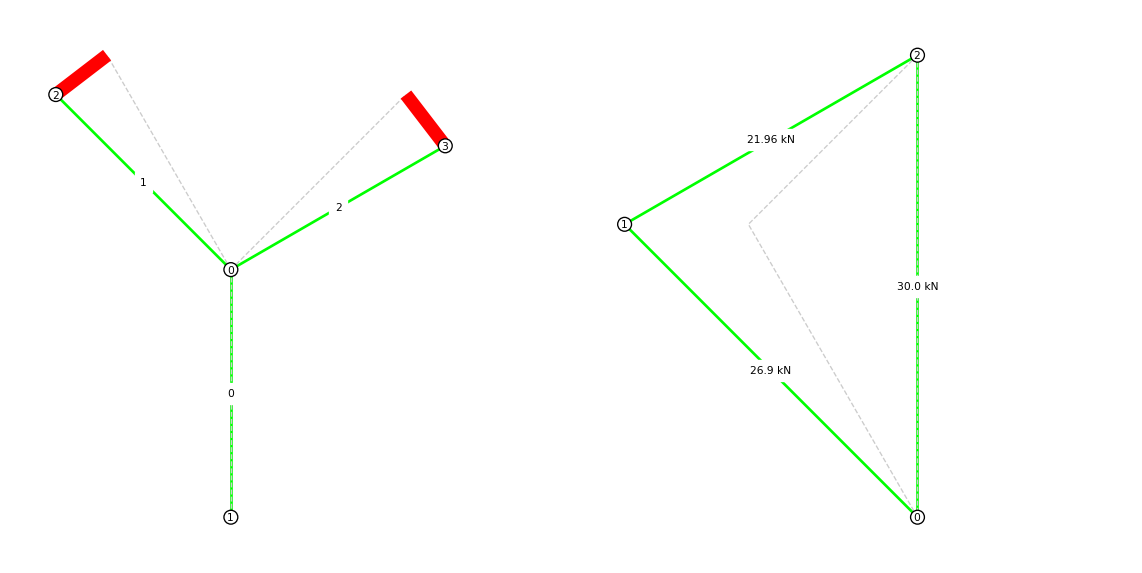

In [7]:
# add arrow to lines to indicate movement
form_lines.append({
    'start': form_key_xyz[2],
    'end': form.vertex_coordinates(2),
    'color': '#ff0000',
    'width': 10.0,
    'style': '-',
})
form_lines.append({
    'start': form_key_xyz[3],
    'end': form.vertex_coordinates(3),
    'color': '#ff0000',
    'width': 10.0,
    'style': '-',
})

# display form and force diagrams
viewer = Viewer(form, force, delay_setup=False, figsize=(12, 10))

viewer.draw_form(
    arrows_on=False,
    lines=form_lines,
    vertexsize=0.15,
    vertexlabel={key: key for key in form.vertices()},
    edgelabel={uv: index for index, uv in enumerate(form.edges())},)

# compute the forces
force_dict = {}
for i, (u,v) in enumerate(force.edges()):
    length = distance_point_point(force.vertex_coordinates(u), force.vertex_coordinates(v))
    length = round(length, 2)
    force_dict[(u,v)] = "%s kN" % length

viewer.draw_force(
    arrows_on=False,
    lines=force_lines,
    vertexsize=0.15,
    vertexlabel={key: key for key in force.vertices()},
    edgelabel=force_dict,)

viewer.show()

###    modify force diagram

In [8]:
# store lines representing the current state of equilibrium
form_lines = []
for u, v in form.edges():
    form_lines.append({
        'start': form.vertex_coordinates(u, 'xy'),
        'end': form.vertex_coordinates(v, 'xy'),
        'width': 1.0,
        'color': '#cccccc',
        'style': '--'
    })
force_lines = []
for u, v in force.edges():
    force_lines.append({
        'start': force.vertex_coordinates(u, 'xy'),
        'end': force.vertex_coordinates(v, 'xy'),
        'width': 1.0,
        'color': '#cccccc',
        'style': '--'
    })

# store the original vertex locations
force_key_xyz = {key: force.vertex_coordinates(key) for key in force.vertices()}

In [9]:
import numpy as np
import compas_ags.ags2.rootfinding as rf
from compas_ags.ags2.constraints import ConstraintsCollection, HorizontalFix, VerticalFix

# set constraints
C = ConstraintsCollection(form)
C.add_constraint(HorizontalFix(form, 0))
C.add_constraint(VerticalFix(form, 0))
C.constrain_dependent_leaf_edges_lengths()

# modify the geometry of the force diagram and update the form diagram using Newton's method
###
### VERTEX INDEX THAT NEED TO BE MODIFIED
###
mod_idx = 1

xy = np.array(form.xy(), dtype=np.float64).reshape((-1, 2))
_xy = np.array(force.xy(), dtype=np.float64).reshape((-1, 2))

###
### VERTEX MODIFICATION
###
_xy[force.key_index()[mod_idx], 0] += 5.5

_X_goal = np.vstack((np.asmatrix(_xy[:, 0]).transpose(), np.asmatrix(_xy[:, 1]).transpose()))
rf.compute_form_from_force_newton(form, force, _X_goal, constraints=C)

i: 1 diff: 5.50e+00
i: 2 diff: 8.10e-01
i: 3 diff: 1.55e-02
i: 4 diff: 3.13e-06
i: 5 diff: 4.86e-13
Converged in 6 iterations


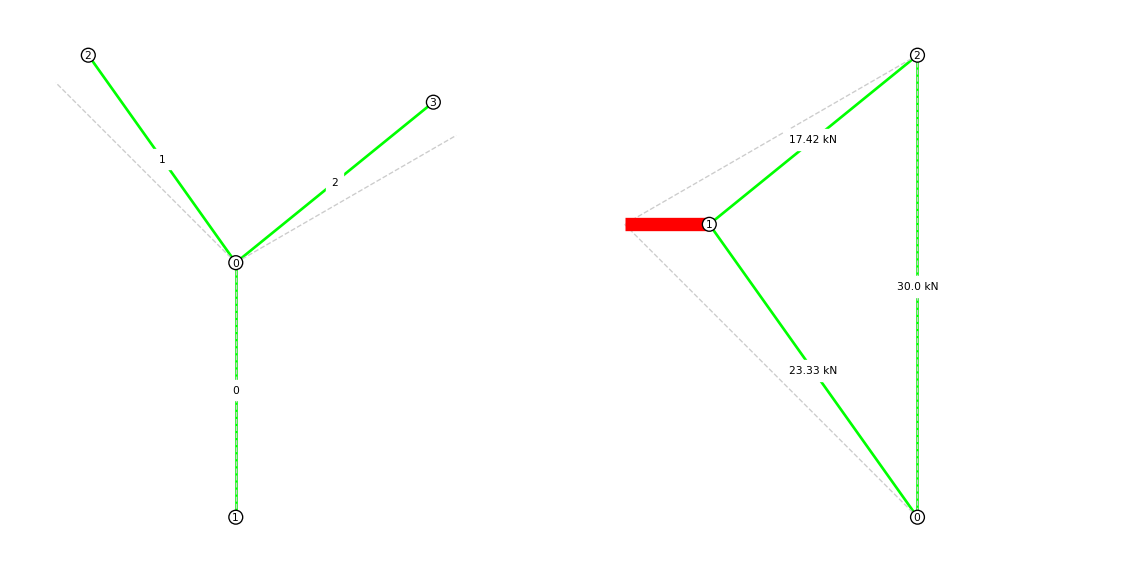

In [10]:
# add arrow to lines to indicate movement
force_lines.append({
    'start': force_key_xyz[mod_idx],
    'end': force.vertex_coordinates(mod_idx),
    'color': '#ff0000',
    'width': 10.0,
    'style': '-',
})

# display form and force diagrams
viewer = Viewer(form, force, delay_setup=False, figsize=(12, 10))

viewer.draw_form(
    arrows_on=False,
    lines=form_lines,
    vertexsize=0.15,
    vertexlabel={key: key for key in form.vertices()},
    edgelabel={uv: index for index, uv in enumerate(form.edges())},)

# compute the forces
force_dict = {}
for i, (u,v) in enumerate(force.edges()):
    length = distance_point_point(force.vertex_coordinates(u), force.vertex_coordinates(v))
    length = round(length, 2)
    force_dict[(u,v)] = "%s kN" % length

viewer.draw_force(
    arrows_on=False,
    lines=force_lines,
    vertexsize=0.15,
    vertexlabel={key: key for key in force.vertices()},
    edgelabel=force_dict,)

viewer.show()